In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt
(x_train , y_train) , (x_test , y_test) = tf.keras.datasets.fashion_mnist.load_data() 

In [2]:
print(y_train)

[9 0 0 ... 3 0 5]


In [3]:
print(x_test.shape)

(10000, 28, 28)


 the label is :  9


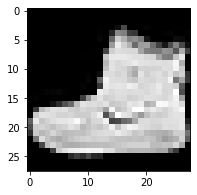

 the label is :  0


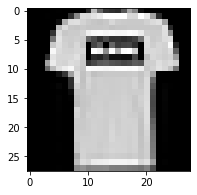

 the label is :  0


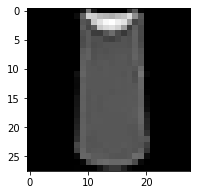

 the label is :  3


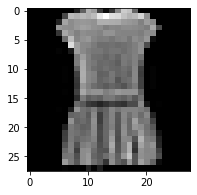

 the label is :  0


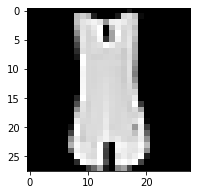

In [4]:
for i in range (0,5):
    plt.figure(figsize = (3,3))
    img = x_train[i]
    plt.imshow(img,cmap="gray")
    print(" the label is : ",y_train[i])
    plt.show()



In [5]:
x_train = x_train.reshape((x_train.shape[0],28,28,1))
x_test = x_test.reshape((x_test.shape[0],28,28,1))
input_shape = (28,28,1)

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255
x_test = x_test/255
print('x_train shape',x_train.shape)
print('Number of images in x_train' , x_train.shape[0])
print('Number of images in x_test' , x_test.shape[0])

x_train shape (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [7]:
print(x_train[0])

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

In [8]:
from keras.models import Sequential
from keras.layers import Dense , Conv2D ,Dropout , Flatten , MaxPooling2D
model = Sequential()
model.add(Conv2D(28,kernel_size=(3,3), input_shape = input_shape))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(128,activation = tf.nn.relu))
model.add(Dropout(0.1))
model.add(Dense(10,activation = tf.nn.softmax))

In [9]:
print(5.0//2)

2.0


In [10]:
model.compile(optimizer = 'adam' , 
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])
model.fit(x=x_train,y=y_train,epochs=6)

Epoch 1/6
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4078 - accuracy: 0.8529
Epoch 2/6
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2742 - accuracy: 0.8994
Epoch 3/6
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2253 - accuracy: 0.9168
Epoch 4/6
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1916 - accuracy: 0.9291
Epoch 5/6
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1655 - accuracy: 0.9387
Epoch 6/6
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1424 - accuracy: 0.9475


In [11]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2688 - accuracy: 0.9132


[0.2687676250934601, 0.9132000207901001]

In [12]:
predictions = model.predict(x_test)
print(predictions)

313/313 [==============================] - 0s 1ms/step
[[1.4320497e-08 2.4994501e-10 3.5584853e-09 ... 8.0848305e-04
  2.4917982e-08 9.9916780e-01]
 [1.4727578e-07 1.1802560e-15 9.9996376e-01 ... 8.3037630e-15
  5.4851249e-11 5.8761074e-16]
 [1.1633966e-12 1.0000000e+00 1.7000038e-18 ... 2.9253417e-20
  6.2530884e-17 1.2318708e-23]
 ...
 [7.3807371e-07 2.4881127e-11 1.8084844e-05 ... 2.8832983e-09
  9.9997759e-01 3.7443049e-09]
 [4.1974306e-12 1.0000000e+00 7.4264095e-16 ... 5.2171423e-17
  1.4441871e-14 2.9540582e-14]
 [9.2796745e-06 3.1678712e-07 4.3681575e-05 ... 3.9996557e-02
  6.1797572e-04 1.4595463e-04]]


In [13]:
print(predictions[0])

[1.4320497e-08 2.4994501e-10 3.5584853e-09 3.2510739e-10 3.0531375e-08
 2.3655284e-05 1.2948940e-09 8.0848305e-04 2.4917982e-08 9.9916780e-01]


1/1 [==============================] - 0s 12ms/step
[[2.2686597e-09 1.2215616e-10 1.2152395e-08 2.1032084e-12 6.3608073e-12
  1.1224968e-06 1.9672265e-12 9.9999893e-01 5.7744192e-08 6.6864758e-10]]


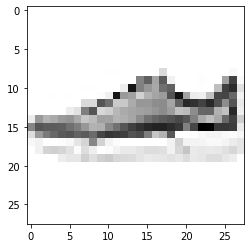

In [14]:
image_index = 9
plt.imshow(x_test[image_index].reshape(28,28),cmap ='Greys')
pred = model.predict(x_test[image_index].reshape(1,28,28,1))
print(pred)

In [15]:
p = pred.argmax()
D= {0:'T-shirt' , 1:'Trouser' , 2:'Pull Over' , 3:'Dress' , 4:'Coat' , 5:'Snadals' , 6:'Shirt' , 7:'Sneakers' , 8:'Bag' , 9:'Ankle Boots'}
print('Expected answer :' , D[p])
st1 = D[p]
print('Actual Answer' , D[y_test[image_index]])
st2 = D[y_test[image_index]]

Expected answer : Sneakers
Actual Answer Sneakers


In [16]:
if(st1 == st2)
{
    print("matched")
}
else
{
    print("unmatched")
}

SyntaxError: invalid syntax (311854501.py, line 1)